# APS1070 Week 7 Lecture Code
## Example 1 - Projections




In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg as LA

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
b = np.array([[1, 2, 2]]).T
b

array([[1],
       [2],
       [2]])

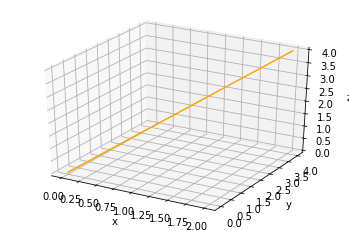

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

b_x = np.linspace(0, 2, 10)
b_y = b[1]/b[0]*b_x
b_z = b[2]/b[0]*b_x

ax.plot3D(b_x, b_y, b_z, 'orange')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Create arbitrary vector or point

In [ ]:
x = np.array([[1, 1, 1]]).T
x

array([[1],
       [1],
       [1]])

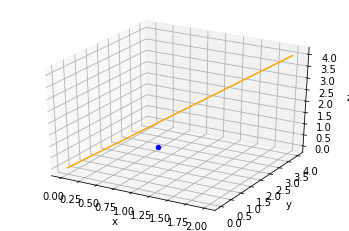

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x_x = x[0]
x_y = x[1]
x_z = x[2]

ax.plot3D(b_x, b_y, b_z, 'orange')
ax.scatter3D(x_x, x_y, x_z, color="b");
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Prepare projection matrix

$P_\pi = \frac{bb^T}{b^Tb}$

In [ ]:
P = b@b.T/(b.T@b)
P

array([[0.11111111, 0.22222222, 0.22222222],
       [0.22222222, 0.44444444, 0.44444444],
       [0.22222222, 0.44444444, 0.44444444]])

Project vector x onto the line

In [ ]:
Px = P@x

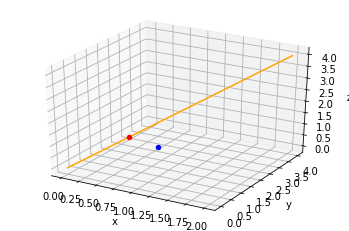

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Px_x = Px[0]
Px_y = Px[1]
Px_z = Px[2]

ax.plot3D(b_x, b_y, b_z, 'orange')
ax.scatter3D(x_x, x_y, x_z, color="b");
ax.scatter3D(Px_x, Px_y, Px_z, color="r");
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

What about projecting other points?

In [ ]:
#create a second point "h"
h = np.array([[1, 3, 3]]).T
h

array([[1],
       [3],
       [3]])

Project h onto the line

In [ ]:
Ph = P@h
Ph

array([[1.44444444],
       [2.88888889],
       [2.88888889]])

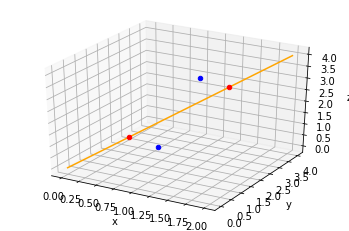

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

h_x = h[0]
h_y = h[1]
h_z = h[2]

Ph_x = Ph[0]
Ph_y = Ph[1]
Ph_z = Ph[2]

ax.plot3D(b_x, b_y, b_z, 'orange')
ax.scatter3D(x_x, x_y, x_z, color="b");
ax.scatter3D(Px_x, Px_y, Px_z, color="r");
ax.scatter3D(h_x, h_y, h_z, color="b");
ax.scatter3D(Ph_x, Ph_y, Ph_z, color="r");
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

What about a point already in the span of $b$?

In [ ]:
# create point "i" that is on the line
i = np.array([[2, 4, 4]]).T
i

array([[2],
       [4],
       [4]])

Project i onto the line...

In [ ]:
Pi = P@i
Pi

array([[2.],
       [4.],
       [4.]])

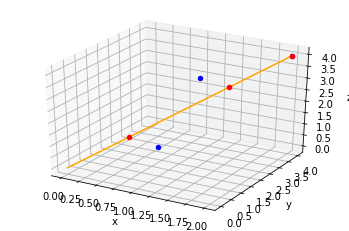

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

i_x = i[0]
i_y = i[1]
i_z = i[2]

Pi_x = Pi[0]
Pi_y = Pi[1]
Pi_z = Pi[2]

ax.plot3D(b_x, b_y, b_z, 'orange')
ax.scatter3D(x_x, x_y, x_z, color="b");
ax.scatter3D(Px_x, Px_y, Px_z, color="r");
ax.scatter3D(h_x, h_y, h_z, color="b");
ax.scatter3D(Ph_x, Ph_y, Ph_z, color="r");
ax.scatter3D(i_x, i_y, i_z, color="b");
ax.scatter3D(Pi_x, Pi_y, Pi_z, color="r");
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


Recall that projecting the projection matrix onto itself results in P = PP

In [ ]:
P

array([[0.11111111, 0.22222222, 0.22222222],
       [0.22222222, 0.44444444, 0.44444444],
       [0.22222222, 0.44444444, 0.44444444]])

In [ ]:
P@P

array([[0.11111111, 0.22222222, 0.22222222],
       [0.22222222, 0.44444444, 0.44444444],
       [0.22222222, 0.44444444, 0.44444444]])

## Example 2 - Projection onto Subspace
Projection onto a line can be thought of as a projection onto a 1-d subspace. Now we will project onto a 2-d subspace.

In [ ]:
# create our 2-d subspace using two independent basis vectors
B = np.array([[1, 0], [1, 1], [1, 2]])
B

array([[1, 0],
       [1, 1],
       [1, 2]])

In [ ]:
# create arbitrary vector x
x = np.array([[6], [0], [0]])
x

array([[6],
       [0],
       [0]])

In [ ]:
B.T@B

array([[3, 3],
       [3, 5]])

In [ ]:
B.T@x

array([[6],
       [0]])

In [ ]:
lam = np.linalg.solve(B.T@B, B.T@x)
lam

array([[ 5.],
       [-3.]])

In [ ]:
proj = B@lam
proj

array([[ 5.],
       [ 2.],
       [-1.]])

In [ ]:
#Projection error
np.linalg.norm(x-proj)

2.449489742783178

In [ ]:
P = B@np.linalg.inv(B.T@B)@B.T
P

array([[ 0.83333333,  0.33333333, -0.16666667],
       [ 0.33333333,  0.33333333,  0.33333333],
       [-0.16666667,  0.33333333,  0.83333333]])

In [ ]:
P@P

array([[ 0.83333333,  0.33333333, -0.16666667],
       [ 0.33333333,  0.33333333,  0.33333333],
       [-0.16666667,  0.33333333,  0.83333333]])

Visualize the projection of points onto a 2-d subspace

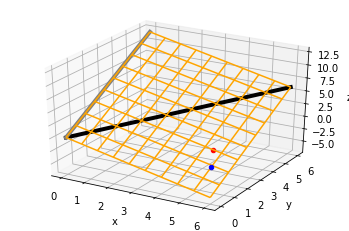

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

normal_to_plane = np.cross(B[:,0], B[:,1]) #more info here: https://math.stackexchange.com/questions/562123/equation-of-plane-containing-two-vectors

B_x, B_y = np.meshgrid(np.linspace(0, 6, 10), np.linspace(0, 6, 10))
B_z = (-normal_to_plane[0]*B_x - normal_to_plane[1]*B_y) / normal_to_plane[2] #based on algorithm here: https://stackoverflow.com/questions/3461869/plot-a-plane-based-on-a-normal-vector-and-a-point-in-matlab-or-matplotlib/23006541

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_wireframe(B_x, B_y, B_z, color = 'orange')

U1_x = np.linspace(0, 6, 10)
U1_y = B[1,0]/B[0,0]*U1_x
U1_z = B[2,0]/B[0,0]*U1_x
ax.plot3D(U1_x, U1_y, U1_z, 'black', linewidth=4)

U2_x = np.linspace(0,0,10)
U2_y = np.linspace(0, 6, 10)
U2_z = B[2,1]/B[1,1]*U2_y
ax.plot3D(U2_x, U2_y, U2_z, 'grey', linewidth=4)

Px = P@x

x_x = x[0]
x_y = x[1]
x_z = x[2]

Px_x = Px[0]
Px_y = Px[1]
Px_z = Px[2]

ax.scatter3D(x_x, x_y, x_z, color="b");
ax.scatter3D(Px_x, Px_y, Px_z, color="r");

# change the point of view
#ax.view_init(65, 90)